<a href="https://colab.research.google.com/github/ZeroLeon/NLP_Project_with_FastAI/blob/master/Q%26A_Labeling_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
base_dir = '/content/gdrive/My Drive/work_space'
path = Path(base_dir +'/data/')
#path.mkdir(parents=True,exist_ok=True) 
os.chdir(path) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import plotly.express as px
import plotly.graph_objects as go
from fastai.text import *
from fastai.callbacks import * 

In [0]:
pth = Path('/content/gdrive/My Drive/fastai/data/kaggle_google_QA_label')
os.chdir(pth)

# Load Competition Files

In [0]:
import glob
fname_list = glob.glob('*')
fname_list


['sample_submission.csv',
 'test.csv',
 'train.csv',
 'databunch_1.pkl',
 'models',
 'submission.csv']

In [0]:
train = pd.read_csv(fname_list[2])
test = pd.read_csv(fname_list[1])
submisssion = pd.read_csv(fname_list[0])


In [0]:
def df_info(df):
  print(df.shape,df.columns)

In [0]:
df_info(train)

(6079, 41) Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'ans

In [0]:
df_info(test)

(476, 11) Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')


In [0]:
df_info(submisssion)

(476, 31) Index(['qa_id', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written'],
      dtype='object')


# First Week -- Build a Baseline

In [0]:
target_cols = ['question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions','question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written','answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written']

input_cols = ['question_title', 'question_body', 'answer']

In [0]:
!pip install transformers

     |████████████████████████████████| 368kB 2.8MB/s 
     |████████████████████████████████| 1.0MB 63.1MB/s 
     |████████████████████████████████| 675kB 56.4MB/s 
     |████████████████████████████████| 860kB 50.0MB/s 
  Created wheel for regex: filename=regex-2019.12.9-cp36-cp36m-linux_x86_64.whl size=609192 sha256=50772538140f2f11cdea94486983eb9b95d48922204e755032674296a5d55688
  Stored in directory: /root/.cache/pip/wheels/0d/fb/b3/a89169557229468c49ca64f6839418f22461f6ee0a74f342b1
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=454cedfe816fc8d3c91f50b19dc198b1c41b92cabb10970bc0087e9ff69efdd4
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built regex sacremoses


In [0]:
from transformers import BertTokenizer,BertConfig,BertForSequenceClassification

In [0]:
class easy_classification(BertForSequenceClassification):
  def forward(self, *args, **kwargs):
    return super().forward(*args, **kwargs)[0]


In [0]:
#set the model
bert_model = easy_classification.from_pretrained('bert-base-uncased',num_labels=(len(target_cols)))

100%|██████████| 440473133/440473133 [00:32<00:00, 13519729.17B/s]


In [0]:
bert_tok = BertTokenizer.from_pretrained(
   'bert-base-uncased'
)

In [0]:
bert_tok.tokenize('This leaderboard is calculated with approximately 13% of the test data.')

In [0]:
class FastAiBertTokenizer(BaseTokenizer):
    """Wrapper around BertTokenizer to be compatible with fast.ai"""
    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int=128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length"""
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

In [0]:
fastai_tokenizer = Tokenizer(
    tok_func=FastAiBertTokenizer(bert_tok, max_seq_len=128), 
    pre_rules=[], 
    post_rules=[]
)

In [0]:
fastai_bert_vocab = Vocab(list(bert_tok.vocab.keys()))

In [0]:
#Split training and validation set, set random_state to ensure repeatability with a new random seed
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train,random_state=42)

In [0]:
print(train_df.shape)
print(valid_df.shape)

(4559, 41)
(1520, 41)


In [0]:
text_cols = input_cols
label_cols = target_cols

In [0]:
databunch = TextClasDataBunch.from_df(".", train_df, valid_df,test,
                  tokenizer=fastai_tokenizer,
                  vocab=fastai_bert_vocab,
                  include_bos=False,
                  include_eos=False,
                  text_cols= text_cols,
                  label_cols= label_cols,
                  bs=32,
                  collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
             )

In [0]:
# databunch.save('databunch_1.pkl')

In [0]:
databunch = load_data(".",'databunch_1.pkl', bs=32) 

In [0]:
databunch.show_batch()

text,target
"[CLS] word describing the reversal of emotions a boy is highly confident one day and the next day scared , tim ##id and shy . a girl is emotional one day and emotion ##less the next . is there a term for a drastic switching of emotions ? a term for the switching to practically opposite emotions ? edit : just to clarify the emotional changes are not rapid ,",question_asker_intent_understanding;question_expect_short_answer;question_fact_seeking
"[CLS] adding elements into ass ##oc ##ia ##tive array in java ##script i ' m trying to add elements into an ass ##oc ##ia ##tive array , which is colors = [ ] i want it to have the [ "" id "" : selected _ color ] but my browser keeps crashing ( an infinite loop somewhere ? ) i ' m not sure if i ' m adding",question_opinion_seeking;question_type_instructions;answer_helpful;answer_plausible;answer_relevance;answer_type_instructions;answer_well_written
[CLS] how does charlie de ##du ##ce myra is mrs ki ##es ##low ##ski ? in seven psycho ##path ##s charlie ( woody ha ##rre ##lson ) comes to the hospital to find mrs ki ##es ##low ##ski . he finds a patient - who we know is myra ki ##es ##low ##ski - but wrongly assumes that because she is black it cannot be her . he then tells,question_type_reason_explanation;answer_type_reason_explanation
"[CLS] comment before or after the relevant code assuming a comment won ' t fit ( or can ' t go ) on the line it applies to , should one write the comment before the code or after ? well , wherever future readers will best understand the comment ' s scope . in other words , wherever most programmers / script ##ers put such comments . so where",question_asker_intent_understanding;question_expect_short_answer;question_has_commonly_accepted_answer;question_type_instructions;question_well_written;answer_helpful;answer_plausible;answer_relevance;answer_type_instructions
"[CLS] how can i get elements out of an array with template tool ##kit ? i have an array of paths which i want to read out with template tool ##kit . how can i access the array elements of this array ? the situation is this : my @ dir ##s ; open ##di ##r ( dir , ' . / directory / ' ) | | die $",question_fact_seeking;question_has_commonly_accepted_answer;question_type_instructions;answer_helpful;answer_plausible;answer_type_instructions


In [0]:
# %%capture
bert_model.train()

easy_classification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [0]:
#with multilabel situation,we use a corresponding loss function
loss_func = nn.BCEWithLogitsLoss()

In [0]:
learn = Learner( 
    databunch, 
    bert_model,
    loss_func=loss_func,
    metrics=[accuracy]
)

## Start Training

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-04
Min loss divided by 10: 7.59E-04


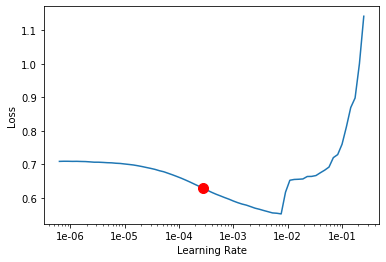

In [0]:
learn.recorder.plot(skip_end=5,suggestion=True)

In [0]:
init_lr = 1e-4

In [0]:
learn.fit_one_cycle(1, max_lr=init_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.420841,0.404994,0.000000,03:33


In [0]:
learn.save('1st_stage')

In [0]:
learn.fit_one_cycle(3, max_lr=init_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.399173,0.392450,0.000000,03:34
1,0.381280,0.379256,0.002105,03:34
2,0.365516,0.376145,0.000263,03:33


In [0]:
learn.save('2nd_stage')

## Get Result

In [0]:
# custom function for ordered predictions
def get_preds_as_nparray(ds_type) -> np.ndarray: 

    preds = learn.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in learn.data.dl(DatasetType.Test).sampler]
    reverse_sampler = np.argsort(sampler)
    ordered_preds = preds[reverse_sampler, :]
    pred_values = np.argmax(ordered_preds, axis=1)
    return ordered_preds, pred_values

In [0]:
result =get_preds_as_nparray(DatasetType.Test)

In [0]:
result[0].shape,len(taget_cols)

((476, 30), 30)

In [0]:
submisssion.iloc[:, 1:] = result[0]

In [0]:
submisssion.head(2).T

,0,1
qa_id,39.000000,46.000000
question_asker_intent_understanding,0.942518,0.861609
question_body_critical,0.743116,0.546261
question_conversational,0.184774,0.006533
question_expect_short_answer,0.661701,0.782285
question_fact_seeking,0.558421,0.816810
question_has_commonly_accepted_answer,0.538276,0.915711
question_interestingness_others,0.660920,0.540134
question_interestingness_self,0.657563,0.454008
question_multi_intent,0.330964,0.179467


In [0]:
submisssion.to_csv('submission.csv', index=False)

In [0]:
import plotly.figure_factory as ff
fig = ff.create_distplot([train[c] for c in taget_cols], taget_cols, bin_size=.25)
fig.show()

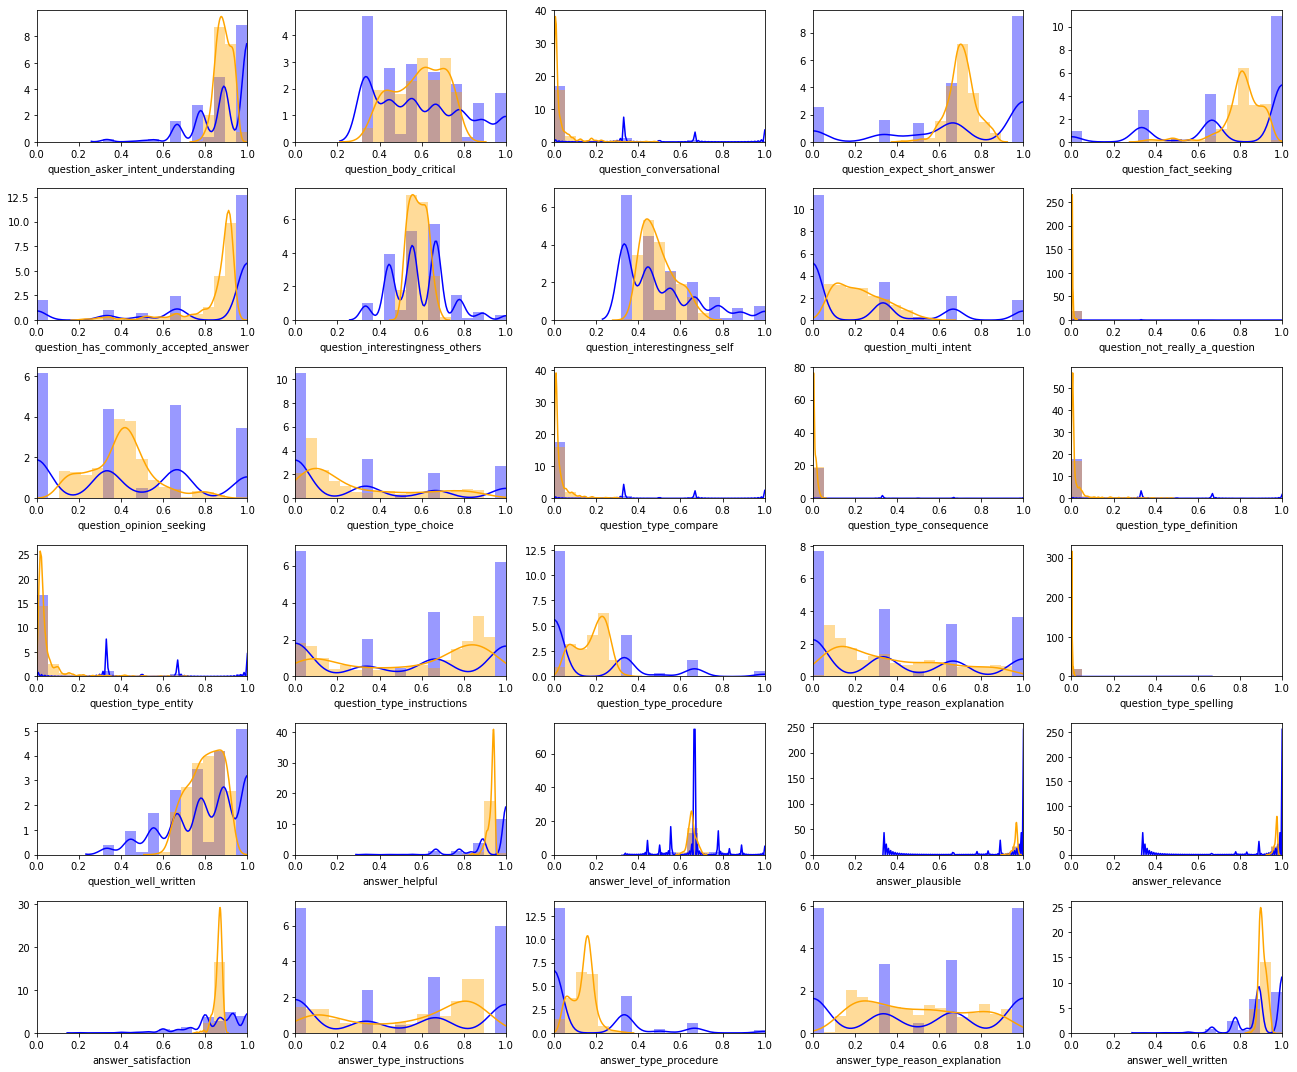

In [0]:
import seaborn as sns
fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(taget_cols):
    ax = axes[i]
    sns.distplot(train[col], label=col, bins=bins, ax=ax, color='blue')
    sns.distplot(submisssion[col], label=col, bins=bins, ax=ax, color='orange')
    # ax.set_title(col)
    ax.set_xlim([0, 1])
plt.tight_layout()
plt.show()
plt.close()